# Project 2 Ames Housing



## Data description

The data set consists of housing prices and roughly 80 attributes describing the property and structure for Ames, IA.  Both the training and test sets included data from years 2006 to 2010. A data dictionary can be found at the end of this notebook.

The target variable is the sale price (SalePrice) and the other fields are considered independent variables used to model this value.



## Imports

In [219]:
# Imports:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set the graph style
sns.set_style('whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Read in data

In [263]:
# Set relative data path
data_path = "../datasets"
test_file_name = "test.csv"
train_file_name = "train.csv"

a_tst = pd.read_csv(os.path.join(data_path, test_file_name))
a_trn = pd.read_csv(os.path.join(data_path, train_file_name))


### View dataframes and data

1. Look at all columns for both the train and test data sets
2. Pick a set of features to examine first
3. Explore these features individually


In [264]:
# Look at the train and test data sets
print("Train", a_trn.shape)
print(a_trn.columns)
# print(a_trn.info())

print ("Test", a_tst.shape)
print(a_tst.columns)
# print(a_tst.info())


Train (2051, 81)
Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Y

### Variable notes

* Excluded from analysis
    * Low Qual Fin SF has only 33 values that are not zero
    * 1st Flr SF + 2nd Flr SF = Gr Liv Area except for 33 values used Gr Liv Area
    * Lot Frontage has 330 missing values

    
* Missing values (NaN values)
    * Set Bsmt Full Bath NaN values to 0 (2 values)
    * Set Bsmt Half Bath NaN values to 0 (2 values)
    * Set Total Bsmt SF NaN values to 0 (1 values)
    * Set Bsmt Cond NaN values to NA (55 values in train dataset)
    * Set Garage Type NaN values to NA (113 values in train dataset)
    * Set Pool QC values to NA (2042 values in train dataset)
    * Set Misc Features values to NA (1986 values in train dataset)
        

### Functions

In [325]:
# Function to streamline min, max, type and null
def print_summary(df):
    for column in df.columns:
        print("Column: %15s  min: %10s  max: %10s  type: %10s  null: %10s" % (column, 
                                                              str(df[column].min()), 
                                                              str(df[column].max()),
                                                              str(df[column].dtype),
                                                              str(df[column].isnull().sum())))

# Function to compare value counts in the first data frame to others
def compare_value_counts(df_list, col):

    # Print headers
    print("Column: %10s " % col)
    for i in range(len(df_list)):
        print("%20s" % ("Dataframe "+str(i)), end=" ")
    print("\n")
    # Print the value counts in each data frame
    for val in df_list[0][col].value_counts().index:
        i = 0
        for df in df_list:
            if i == len(df_list) - 1:
                print("%10s %10s" % (val, df[df[col]==val][col].count()))
            else:
                print("%10s %10s" % (val, df[df[col]==val][col].count()), end =" ")                    
            i += 1
    print("\n")
    
    
# function plot histograms using seaborn distplot
def subplot_histograms(df, list_of_cols, 
                       list_of_titles, 
                       list_of_xlabels,
                       list_of_ylabels, 
                       figsize):
    
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_cols)/2))
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = figsize)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, col in enumerate(list_of_cols):
        ax[i] = sns.distplot(df[col], ax = ax[i])
        ax[i].set_title(list_of_titles[i], fontsize = 14)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 12)
        

In [266]:
# Examine Low Qual Fin SF
a_trn[a_trn['Low Qual Fin SF']!=0].shape


(33, 81)

In [267]:
# Examine '1st Flr SF' and '2nd Flr SF' and 'GR Liv Area'
a_trn[(a_trn['Gr Liv Area'] - (a_trn['1st Flr SF'] + a_trn['2nd Flr SF']))!=0][['Gr Liv Area','1st Flr SF','2nd Flr SF']]


,Gr Liv Area,1st Flr SF,2nd Flr SF
249,845,640,0
269,1200,520,600
320,1382,854,0
356,1526,1013,0
382,2229,929,929
497,1639,1166,0
705,1594,828,658
828,2377,1313,0
858,3395,1440,1440
918,1869,1188,561


### Establish a set of features to model

In [268]:
# Create a subset list of features
targ = ['SalePrice']
feat_1 = ['MS SubClass', 'MS Zoning', 'Lot Area', 'Utilities', 'Lot Config', 'Neighborhood', 'Bldg Type',
         'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add','Exter Qual',
         'Exter Cond', 'Bsmt Cond', 'Total Bsmt SF','Heating QC', 'Central Air',
         'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
         'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen Qual', 'Functional','Enclosed Porch',
         'Garage Type', 'Pool QC','Misc Feature','Mo Sold', 'Yr Sold', 'Sale Type']

new_names = {'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning', 'Lot Area':'lot_area', 'Utilities': 'util', 
             'Lot Config': 'lot_config', 'Neighborhood': 'neigh', 'Bldg Type' : 'bld_type',
             'House Style':'hs_style', 'Overall Qual':'over_qual', 'Overall Cond':'over_cond', 
             'Year Built':'yr_built', 'Year Remod/Add':'yr_remodel','Exter Qual':'ext_qual',
             'Exter Cond':'ext_cond', 'Bsmt Cond':'bsmt_cond', 'Total Bsmt SF':'tot_bsmt_sf',
             'Heating QC':'heat_qc', 'Central Air': 'cen_air', 'Gr Liv Area':'gr_liv_area', 
             'Bsmt Full Bath':'bsmt_full_bath', 'Bsmt Half Bath':'bsmt_half_bath',
             'Full Bath': 'full_bath', 'Half Bath':'half_bath', 'Bedroom AbvGr':'bed_abvgr', 
             'Kitchen Qual':'kit_qual', 'Functional':'funct','Enclosed Porch':'enc_porch',
             'Garage Type':'garag_type', 'Pool QC':'pool_qc','Misc Feature':'misc_feat',
             'Mo Sold':'mon_sold', 'Yr Sold':'yr_sold', 'Sale Type':'sale_type'}

X1_trn = a_trn[feat_1]
X1_trn.rename(columns = new_names, inplace = True)

X1_tst = a_tst[feat_1]
X1_tst.rename(columns = new_names, inplace = True)


In [291]:
# view the test file
X1_tst.head()


,lot_area,over_qual,over_cond,yr_built,yr_remodel,tot_bsmt_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,...,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,age_home_at_sale,age_remodel_at_sale
0,9142,6,8,1910,1950,1020.0,1928,0.0,0.0,2,...,0,0,0,0,0,0,0,1,96,96
1,9662,5,4,1977,1977,1967.0,1967,0.0,0.0,2,...,0,0,0,0,0,0,0,1,29,29
2,17104,7,5,2006,2006,654.0,1496,1.0,0.0,2,...,0,0,0,0,1,0,0,0,0,0
3,8520,5,6,1923,2006,968.0,968,0.0,0.0,1,...,0,0,0,0,0,0,0,1,84,84
4,9500,6,5,1963,1963,1394.0,1394,1.0,0.0,1,...,0,0,0,0,0,0,0,1,46,46


### Handle NaN values

In [269]:
# Examine the X1_trn 
df = X1_trn
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 33 columns):
ms_subclass       2051 non-null int64
ms_zoning         2051 non-null object
lot_area          2051 non-null int64
util              2051 non-null object
lot_config        2051 non-null object
neigh             2051 non-null object
bld_type          2051 non-null object
hs_style          2051 non-null object
over_qual         2051 non-null int64
over_cond         2051 non-null int64
yr_built          2051 non-null int64
yr_remodel        2051 non-null int64
ext_qual          2051 non-null object
ext_cond          2051 non-null object
bsmt_cond         1996 non-null object
tot_bsmt_sf       2050 non-null float64
heat_qc           2051 non-null object
cen_air           2051 non-null object
gr_liv_area       2051 non-null int64
bsmt_full_bath    2049 non-null float64
bsmt_half_bath    2049 non-null float64
full_bath         2051 non-null int64
half_bath         2051 non-null int64
be

In [270]:
# Examine the X1_trn 
df = X1_tst
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 33 columns):
ms_subclass       879 non-null int64
ms_zoning         879 non-null object
lot_area          879 non-null int64
util              879 non-null object
lot_config        879 non-null object
neigh             879 non-null object
bld_type          879 non-null object
hs_style          879 non-null object
over_qual         879 non-null int64
over_cond         879 non-null int64
yr_built          879 non-null int64
yr_remodel        879 non-null int64
ext_qual          879 non-null object
ext_cond          879 non-null object
bsmt_cond         854 non-null object
tot_bsmt_sf       879 non-null int64
heat_qc           879 non-null object
cen_air           879 non-null object
gr_liv_area       879 non-null int64
bsmt_full_bath    879 non-null int64
bsmt_half_bath    879 non-null int64
full_bath         879 non-null int64
half_bath         879 non-null int64
bed_abvgr         879 non-null in

In [271]:
# Find and replace null values with 0
df_l = [X1_trn, X1_tst]
col_l = ['bsmt_full_bath','bsmt_half_bath','tot_bsmt_sf']

for df in df_l:
    for col in col_l:
        # Fill the null values with NA
        df[col] = df[col].fillna(0)


In [272]:
# Find and replace null values with NA
df_l = [X1_trn, X1_tst]
col_l = ['bsmt_cond','garag_type', 'pool_qc','misc_feat']

for df in df_l:
    for col in col_l:
        # Fill the null values with NA
        df[col] = df[col].fillna("NA")


### Show maximum and minimum values

In [275]:
# Describe
X1_trn.describe().T


,count,mean,std,min,25%,50%,75%,max
ms_subclass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
over_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
over_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
yr_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.0,2010.0
yr_remodel,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.0,2010.0
tot_bsmt_sf,2051.0,1057.471965,449.908003,0.0,793.0,994.0,1318.5,6110.0
gr_liv_area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
bsmt_full_bath,2051.0,0.427109,0.522589,0.0,0.0,0.0,1.0,3.0
bsmt_half_bath,2051.0,0.063384,0.251590,0.0,0.0,0.0,0.0,2.0


In [276]:
# Describe
X1_tst.describe().T


,count,mean,std,min,25%,50%,75%,max
ms_subclass,879.0,58.270762,42.211389,20.0,20.0,50.0,70.0,190.0
lot_area,879.0,10340.920364,10047.335167,1477.0,7298.5,9453.0,11606.5,215245.0
over_qual,879.0,6.054608,1.374756,2.0,5.0,6.0,7.0,10.0
over_cond,879.0,5.565415,1.128422,1.0,5.0,5.0,6.0,9.0
yr_built,879.0,1970.533561,30.403527,1880.0,1954.0,1972.0,2000.0,2010.0
yr_remodel,879.0,1984.444824,20.454546,1950.0,1967.0,1992.0,2003.0,2010.0
tot_bsmt_sf,879.0,1036.750853,419.258428,0.0,790.0,975.0,1248.0,3138.0
gr_liv_area,879.0,1500.531286,517.413260,407.0,1114.0,1436.0,1781.0,4676.0
bsmt_full_bath,879.0,0.440273,0.529983,0.0,0.0,0.0,1.0,2.0
bsmt_half_bath,879.0,0.055745,0.229560,0.0,0.0,0.0,0.0,1.0


In [277]:
# Examine the X1_trn 
df = X1_tst
print_summary(df)


Column:     ms_subclass  min:         20  max:        190  type:      int64  null:          0
Column:       ms_zoning  min:    C (all)  max:         RM  type:     object  null:          0
Column:        lot_area  min:       1477  max:     215245  type:      int64  null:          0
Column:            util  min:     AllPub  max:     NoSewr  type:     object  null:          0
Column:      lot_config  min:     Corner  max:     Inside  type:     object  null:          0
Column:           neigh  min:    Blmngtn  max:    Veenker  type:     object  null:          0
Column:        bld_type  min:       1Fam  max:     TwnhsE  type:     object  null:          0
Column:        hs_style  min:     1.5Fin  max:       SLvl  type:     object  null:          0
Column:       over_qual  min:          2  max:         10  type:      int64  null:          0
Column:       over_cond  min:          1  max:          9  type:      int64  null:          0
Column:        yr_built  min:       1880  max:       2010  t

In [278]:
# Examine the X1_tst 
df = X1_tst
print_summary(df)


Column:     ms_subclass  min:         20  max:        190  type:      int64  null:          0
Column:       ms_zoning  min:    C (all)  max:         RM  type:     object  null:          0
Column:        lot_area  min:       1477  max:     215245  type:      int64  null:          0
Column:            util  min:     AllPub  max:     NoSewr  type:     object  null:          0
Column:      lot_config  min:     Corner  max:     Inside  type:     object  null:          0
Column:           neigh  min:    Blmngtn  max:    Veenker  type:     object  null:          0
Column:        bld_type  min:       1Fam  max:     TwnhsE  type:     object  null:          0
Column:        hs_style  min:     1.5Fin  max:       SLvl  type:     object  null:          0
Column:       over_qual  min:          2  max:         10  type:      int64  null:          0
Column:       over_cond  min:          1  max:          9  type:      int64  null:          0
Column:        yr_built  min:       1880  max:       2010  t

### Examine categorical variables


In [279]:
cat_features = ['ms_subclass', 'ms_zoning', 'util', 'lot_config',
                'neigh', 'bld_type', 'hs_style', 
                'ext_qual', 'ext_cond', 'bsmt_cond', 'heat_qc', 'cen_air',
                'kit_qual', 'funct','garag_type', 'pool_qc', 'misc_feat','sale_type']


In [280]:
num_features = ['lot_area', 'over_qual', 'over_cond', 'yr_built',
                'yr_remodel', 'tot_bsmt_sf', 'gr_liv_area', 'bsmt_full_bath',
                'bsmt_half_bath', 'full_bath', 'half_bath', 'bed_abvgr',
                'enc_porch', 'mon_sold', 'yr_sold']


In [281]:
# Compare the categorical variables in the train and test sets
df_list = [X1_trn, X1_tst]

for col in cat_features:
    compare_value_counts(df_list, col)

Column: ms_subclass 
         Dataframe 0          Dataframe 1 

        20        770         20        309
        60        394         60        181
        50        198         50         89
       120        132        120         60
        30        101         30         38
        70         90         70         38
       160         88        160         41
        80         86         80         32
        90         75         90         34
       190         46        190         15
        85         28         85         20
        75         16         75          7
        45         11         45          7
       180         11        180          6
        40          4         40          2
       150          1        150          0


Column:  ms_zoning 
         Dataframe 0          Dataframe 1 

        RL       1598         RL        675
        RM        316         RM        146
        FV        101         FV         38
   C (all)         19    C (all) 

In [282]:
# Combine the test and training data sets to create categorical variables
X1_trn['ID'] = 'train'
X1_tst['ID'] = 'test'
X_super = pd.concat(df_list)
print(X_super.shape, X1_trn.shape, X1_tst.shape)

X_super.sort_values(by = 'ID', ascending = False)

# reference
# https://stackoverflow.com/questions/48758744/creating-dummy-variables-for-multiple-cateogorical-variables-in-python

(2930, 34) (2051, 34) (879, 34)


,ms_subclass,ms_zoning,lot_area,util,lot_config,neigh,bld_type,hs_style,over_qual,over_cond,...,kit_qual,funct,enc_porch,garag_type,pool_qc,misc_feat,mon_sold,yr_sold,sale_type,ID
0,60,RL,13517,AllPub,CulDSac,Sawyer,1Fam,2Story,6,8,...,Gd,Typ,0,Attchd,NA,NA,3,2010,WD,train
1283,60,RL,13426,AllPub,Corner,CollgCr,1Fam,2Story,7,5,...,Gd,Typ,0,Attchd,NA,NA,9,2006,WD,train
1377,90,RL,10791,AllPub,Inside,Sawyer,Duplex,1Story,4,5,...,TA,Typ,0,CarPort,NA,Shed,10,2006,WD,train
1376,70,RH,8525,AllPub,Inside,SWISU,1Fam,2Story,5,6,...,TA,Typ,0,NA,NA,NA,11,2008,WD,train
1375,120,RL,6289,AllPub,Inside,NridgHt,TwnhsE,1Story,6,5,...,Gd,Typ,0,Attchd,NA,NA,6,2007,WD,train
1374,30,RL,4130,AllPub,Inside,BrkSide,1Fam,1Story,3,6,...,TA,Maj2,0,NA,NA,NA,7,2008,WD,train
1373,50,RL,12354,AllPub,Corner,Edwards,1Fam,1.5Fin,6,8,...,Gd,Typ,0,Detchd,NA,Shed,8,2009,ConLI,train
1372,30,RL,10020,AllPub,Inside,Edwards,1Fam,1Story,1,1,...,Fa,Maj1,0,NA,NA,NA,3,2009,WD,train
1371,60,RL,8702,AllPub,Inside,Gilbert,1Fam,2Story,6,5,...,TA,Typ,0,Attchd,NA,NA,4,2008,WD,train
1370,20,RL,8926,AllPub,Corner,Edwards,1Fam,1Story,4,3,...,TA,Typ,0,Basment,NA,NA,10,2009,COD,train


In [283]:
# Create categorical variables
X_super = pd.get_dummies(X_super, columns = cat_features, drop_first=True)
print(X_super.shape)
print(X_super.columns)


(2930, 133)
Index(['lot_area', 'over_qual', 'over_cond', 'yr_built', 'yr_remodel',
       'tot_bsmt_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath',
       ...
       'misc_feat_TenC', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_VWD', 'sale_type_WD '],
      dtype='object', length=133)


### Create new variables

In [285]:
# Create an age of home variable at time of sale and age of remodel
X_super['age_home_at_sale'] = X_super['yr_sold'] - X_super['yr_built']
X_super['age_remodel_at_sale'] = X_super['yr_sold'] - X_super['yr_built']

### Examine the numerical data

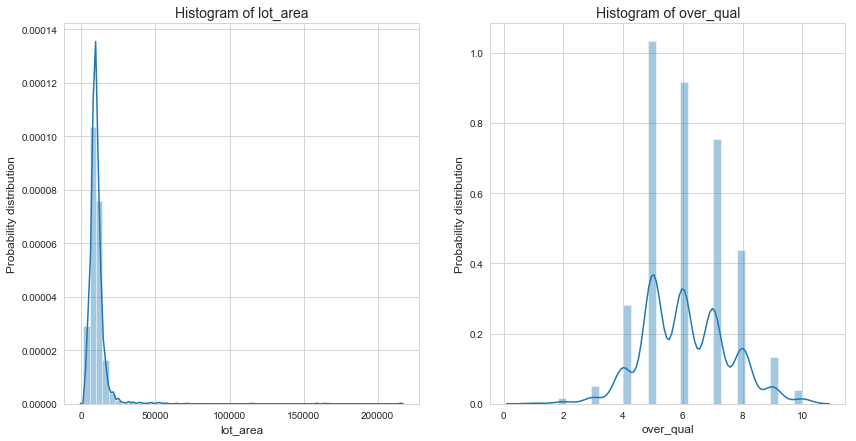

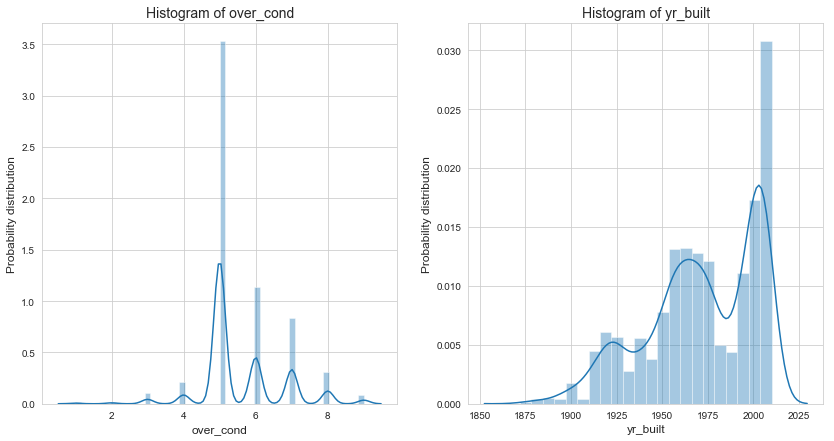

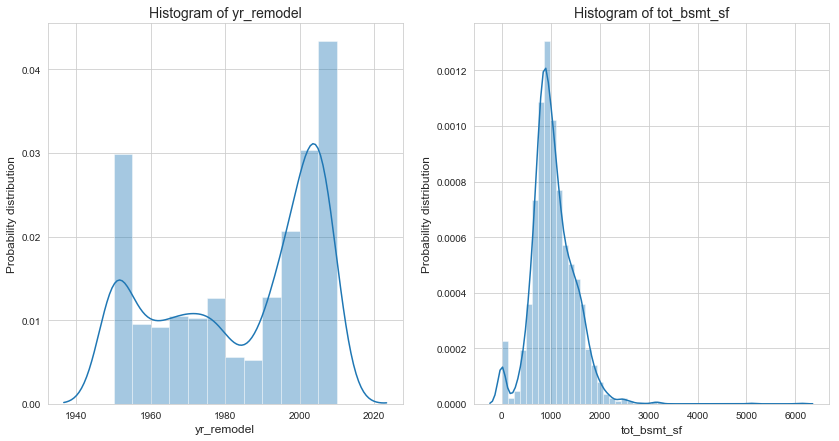

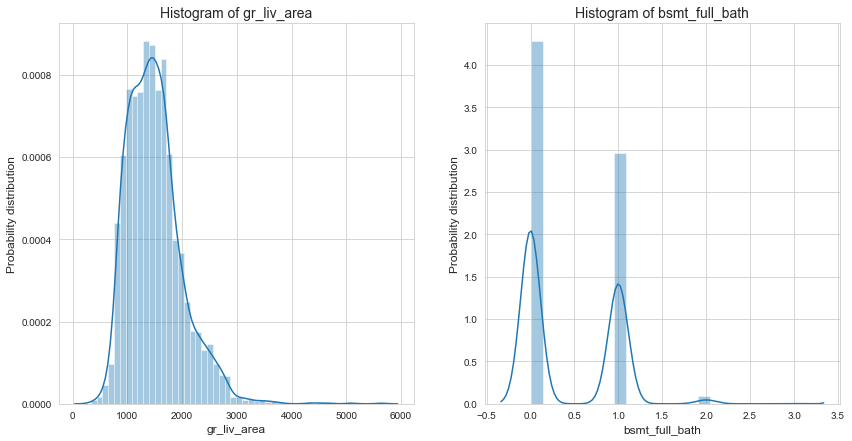

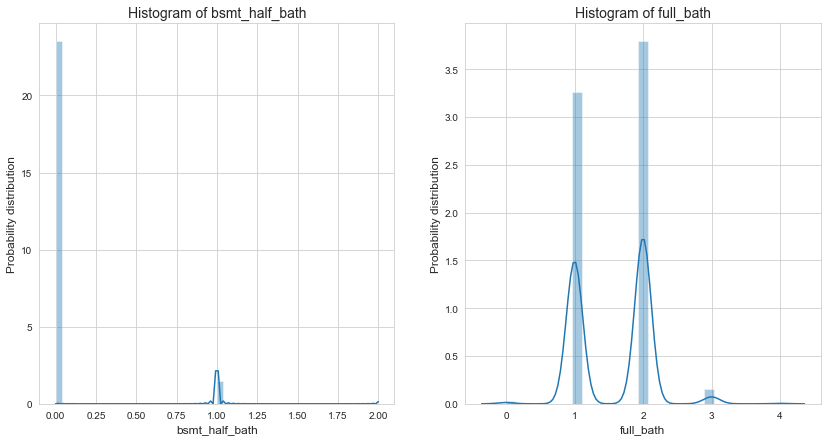

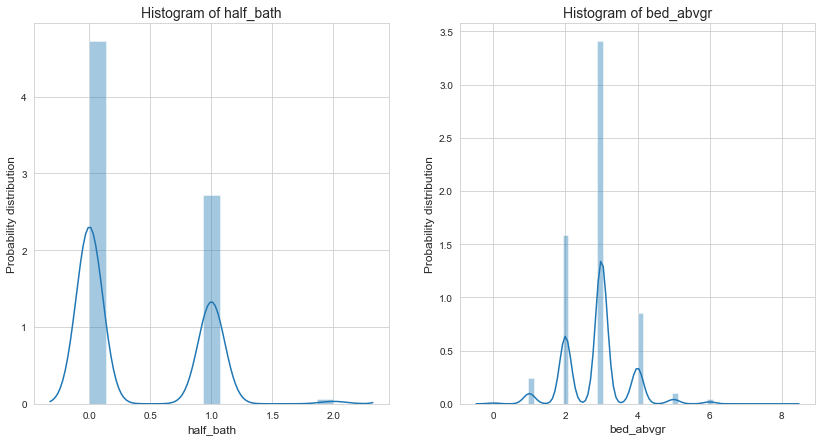

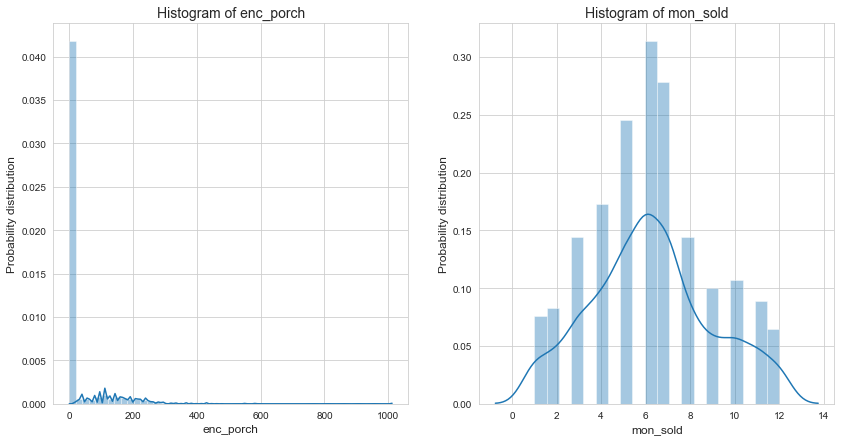

In [346]:
# plot histograms for each numeric variable

for i in range(0, len(num_features) - 2, 2):
    df = X_super
    cols = num_features[i : i + 2]
    titles = ['Histogram of ' + str(cols[0]), 'Histogram of ' + str(cols[1]) ]
    xlabels = cols
    ylabels = ['Probability distribution', 'Probability distribution']

    subplot_histograms(df, cols, titles, xlabels, ylabels, (14,7))


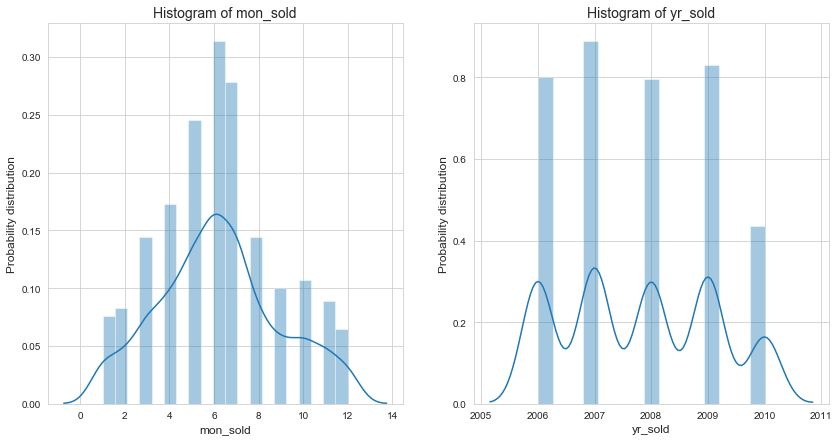

In [345]:
df = X_super
cols = num_features[-2:]
titles = ['Histogram of ' + str(cols[0]), 'Histogram of ' + str(cols[1]) ]
xlabels = cols
ylabels = ['Probability distribution', 'Probability distribution']

subplot_histograms(df, cols, titles, xlabels, ylabels, (14,7))

### Redivide the data and save to data files


In [289]:
# redivide the data use the ID column
X1_trn = X_super[X_super['ID'] == 'train'].drop(columns = ['ID'])
X1_tst = X_super[X_super['ID'] == 'test'].drop(columns = ['ID'])
print(X_super.shape, X1_trn.shape, X1_tst.shape)

X1_tst.head()

(2930, 135) (2051, 134) (879, 134)


,lot_area,over_qual,over_cond,yr_built,yr_remodel,tot_bsmt_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,...,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,age_home_at_sale,age_remodel_at_sale
0,9142,6,8,1910,1950,1020.0,1928,0.0,0.0,2,...,0,0,0,0,0,0,0,1,96,96
1,9662,5,4,1977,1977,1967.0,1967,0.0,0.0,2,...,0,0,0,0,0,0,0,1,29,29
2,17104,7,5,2006,2006,654.0,1496,1.0,0.0,2,...,0,0,0,0,1,0,0,0,0,0
3,8520,5,6,1923,2006,968.0,968,0.0,0.0,1,...,0,0,0,0,0,0,0,1,84,84
4,9500,6,5,1963,1963,1394.0,1394,1.0,0.0,1,...,0,0,0,0,0,0,0,1,46,46


### Save the predictor dataframes to files


In [292]:
# Save the data to csv files
test_dataframe_name = "test_clean.csv"
train_dataframe_name = "train_clean.csv"

X1_tst.to_csv(os.path.join(data_path, test_dataframe_name))
X1_trn.to_csv(os.path.join(data_path, train_dataframe_name))


## Data dictionary

SalePrice - the property's sale price in dollars. 

MSSubClass: The building class
20 1-STORY 1946 & NEWER ALL STYLES
30 1-STORY 1945 & OLDER
40 1-STORY W/FINISHED ATTIC ALL AGES
45 1-1/2 STORY - UNFINISHED ALL AGES
50 1-1/2 STORY FINISHED ALL AGES
60 2-STORY 1946 & NEWER
70 2-STORY 1945 & OLDER
75 2-1/2 STORY ALL AGES
80 SPLIT OR MULTI-LEVEL
85 SPLIT FOYER
90 DUPLEX - ALL STYLES AND AGES
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150 1-1/2 STORY PUD - ALL AGES
160 2-STORY PUD - 1946 & NEWER
180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190 2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
A Agriculture
C Commercial
FV Floating Village Residential
I Industrial
RH Residential High Density
RL Residential Low Density
RP Residential Low Density Park
RM Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property
Grvl Gravel
Pave Paved

Alley: Type of alley access to property
Grvl Gravel
Pave Paved
NA No alley access

LotShape: General shape of property
Reg Regular
IR1 Slightly irregular
IR2 Moderately Irregular
IR3 Irregular

LandContour: Flatness of the property
Lvl Near Flat/Level
Bnk Banked - Quick and significant rise from street grade to building
HLS Hillside - Significant slope from side to side
Low Depression

Utilities: Type of utilities available
AllPub All public Utilities (E,G,W,& S)
NoSewr Electricity, Gas, and Water (Septic Tank)
NoSeWa Electricity and Gas Only
ELO Electricity only

LotConfig: Lot configuration
Inside Inside lot
Corner Corner lot
CulDSac Cul-de-sac
FR2 Frontage on 2 sides of property
FR3 Frontage on 3 sides of property

LandSlope: Slope of property
Gtl Gentle slope
Mod Moderate Slope
Sev Severe Slope

Neighborhood: Physical locations within Ames city limits
Blmngtn Bloomington Heights
Blueste Bluestem
BrDale Briardale
BrkSide Brookside
ClearCr Clear Creek
CollgCr College Creek
Crawfor Crawford
Edwards Edwards
Gilbert Gilbert
IDOTRR Iowa DOT and Rail Road
MeadowV Meadow Village
Mitchel Mitchell
Names North Ames
NoRidge Northridge
NPkVill Northpark Villa
NridgHt Northridge Heights
NWAmes Northwest Ames
OldTown Old Town
SWISU South & West of Iowa State University
Sawyer Sawyer
SawyerW Sawyer West
Somerst Somerset
StoneBr Stone Brook
Timber Timberland
Veenker Veenker

Condition1: Proximity to main road or railroad
Artery Adjacent to arterial street
Feedr Adjacent to feeder street
Norm Normal
RRNn Within 200' of North-South Railroad
RRAn Adjacent to North-South Railroad
PosN Near positive off-site feature--park, greenbelt, etc.
PosA Adjacent to postive off-site feature
RRNe Within 200' of East-West Railroad
RRAe Adjacent to East-West Railroad

Condition2: Proximity to main road or railroad (if a second is present)
Artery Adjacent to arterial street
Feedr Adjacent to feeder street
Norm Normal
RRNn Within 200' of North-South Railroad
RRAn Adjacent to North-South Railroad
PosN Near positive off-site feature--park, greenbelt, etc.
PosA Adjacent to postive off-site feature
RRNe Within 200' of East-West Railroad
RRAe Adjacent to East-West Railroad

BldgType: Type of dwelling
1Fam Single-family Detached
2FmCon Two-family Conversion; originally built as one-family dwelling
Duplx Duplex
TwnhsE Townhouse End Unit
TwnhsI Townhouse Inside Unit

HouseStyle: Style of dwelling
1Story One story
1.5Fin One and one-half story: 2nd level finished
1.5Unf One and one-half story: 2nd level unfinished
2Story Two story
2.5Fin Two and one-half story: 2nd level finished
2.5Unf Two and one-half story: 2nd level unfinished
SFoyer Split Foyer
SLvl Split Level

OverallQual: Overall material and finish quality
10 Very Excellent
9 Excellent
8 Very Good
7 Good
6 Above Average
5 Average
4 Below Average
3 Fair
2 Poor
1 Very Poor

OverallCond: Overall condition rating
10 Very Excellent
9 Excellent
8 Very Good
7 Good
6 Above Average
5 Average
4 Below Average
3 Fair
2 Poor
1 Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof
Flat Flat
Gable Gable
Gambrel Gabrel (Barn)
Hip Hip
Mansard Mansard
Shed Shed

RoofMatl: Roof material
ClyTile Clay or Tile
CompShg Standard (Composite) Shingle
Membran Membrane
Metal Metal
Roll Roll
Tar&Grv Gravel & Tar
WdShake Wood Shakes
WdShngl Wood Shingles
Exterior1st: Exterior covering on house
AsbShng Asbestos Shingles
AsphShn Asphalt Shingles
BrkComm Brick Common
BrkFace Brick Face
CBlock Cinder Block
CemntBd Cement Board
HdBoard Hard Board
ImStucc Imitation Stucco
MetalSd Metal Siding
Other Other
Plywood Plywood
PreCast PreCast
Stone Stone
Stucco Stucco
VinylSd Vinyl Siding
Wd Sdng Wood Siding
WdShing Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)
AsbShng Asbestos Shingles
AsphShn Asphalt Shingles
BrkComm Brick Common
BrkFace Brick Face
CBlock Cinder Block
CemntBd Cement Board
HdBoard Hard Board
ImStucc Imitation Stucco
MetalSd Metal Siding
Other Other
Plywood Plywood
PreCast PreCast
Stone Stone
Stucco Stucco
VinylSd Vinyl Siding
Wd Sdng Wood Siding
WdShing Wood Shingles

MasVnrType: Masonry veneer type
BrkCmn Brick Common
BrkFace Brick Face
CBlock Cinder Block
None None
Stone Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality
Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor

ExterCond: Present condition of the material on the exterior
Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor

Foundation: Type of foundation
BrkTil Brick & Tile
CBlock Cinder Block
PConc Poured Contrete
Slab Slab
Stone Stone
Wood Wood

BsmtQual: Height of the basement
Ex Excellent (100+ inches)
Gd Good (90-99 inches)
TA Typical (80-89 inches)
Fa Fair (70-79 inches)
Po Poor (<70 inches)
NA No Basement

BsmtCond: General condition of the basement
Ex Excellent
Gd Good
TA Typical - slight dampness allowed
Fa Fair - dampness or some cracking or settling
Po Poor - Severe cracking, settling, or wetness
NA No Basement

BsmtExposure: Walkout or garden level basement walls
Gd Good Exposure
Av Average Exposure (split levels or foyers typically score average or above)
Mn Mimimum Exposure
No No Exposure
NA No Basement

BsmtFinType1: Quality of basement finished area
GLQ Good Living Quarters
ALQ Average Living Quarters
BLQ Below Average Living Quarters
Rec Average Rec Room
LwQ Low Quality
Unf Unfinshed
NA No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)
GLQ Good Living Quarters
ALQ Average Living Quarters
BLQ Below Average Living Quarters
Rec Average Rec Room
LwQ Low Quality
Unf Unfinshed
NA No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
Floor Floor Furnace
GasA Gas forced warm air furnace
GasW Gas hot water or steam heat
Grav Gravity furnace
OthW Hot water or steam heat other than gas
Wall Wall furnace

HeatingQC: Heating quality and condition
Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor

CentralAir: Central air conditioning
N No
Y Yes

Electrical: Electrical system
SBrkr Standard Circuit Breakers & Romex
FuseA Fuse Box over 60 AMP and all Romex wiring (Average)
FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
Mix Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality
Ex Excellent
Gd Good
TA Typical/Average
Fa Fair
Po Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating
Typ Typical Functionality
Min1 Minor Deductions 1
Min2 Minor Deductions 2
Mod Moderate Deductions
Maj1 Major Deductions 1
Maj2 Major Deductions 2
Sev Severely Damaged
Sal Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality
Ex Excellent - Exceptional Masonry Fireplace
Gd Good - Masonry Fireplace in main level
TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
Fa Fair - Prefabricated Fireplace in basement
Po Poor - Ben Franklin Stove
NA No Fireplace

GarageType: Garage location
2Types More than one type of garage
Attchd Attached to home
Basment Basement Garage
BuiltIn Built-In (Garage part of house - typically has room above garage)
CarPort Car Port
Detchd Detached from home
NA No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage
Fin Finished
RFn Rough Finished
Unf Unfinished
NA No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality
Ex Excellent
Gd Good
TA Typical/Average
Fa Fair
Po Poor
NA No Garage

GarageCond: Garage condition
Ex Excellent
Gd Good
TA Typical/Average
Fa Fair
Po Poor
NA No Garage

PavedDrive: Paved driveway
Y Paved
P Partial Pavement
N Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
NA No Pool

Fence: Fence quality
GdPrv Good Privacy
MnPrv Minimum Privacy
GdWo Good Wood
MnWw Minimum Wood/Wire
NA No Fence

MiscFeature: Miscellaneous feature not covered in other categories
Elev Elevator
Gar2 2nd Garage (if not described in garage section)
Othr Other
Shed Shed (over 100 SF)
TenC Tennis Court
NA None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale
WD Warranty Deed - Conventional
CWD Warranty Deed - Cash
VWD Warranty Deed - VA Loan
New Home just constructed and sold
COD Court Officer Deed/Estate
Con Contract 15% Down payment regular terms
ConLw Contract Low Down payment and low interest
ConLI Contract Low Interest
ConLD Contract Low Down
Oth Other

# References

* https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
* https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data